### Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error
from sklearn import metrics,linear_model

### Loading Data

In [ ]:
data_df = pd.read_csv('/content/creditcard.csv')

In [ ]:
data_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116941.000000,116941.000000,116941.000000,...,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000
mean,46555.919858,-0.254372,-0.011079,0.679823,0.155177,-0.283503,0.091362,-0.115035,0.059857,-0.072416,...,-0.034690,-0.112270,-0.035781,0.011250,0.131767,0.026812,0.000909,0.002134,94.638640,0.002087
std,18692.683683,1.837763,1.633274,1.296662,1.335851,1.333416,1.293633,1.193083,1.226684,1.097922,...,0.734001,0.638304,0.613066,0.595049,0.438905,0.491057,0.389929,0.315736,256.345117,0.045631
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,35373.000000,-1.021560,-0.586654,0.174900,-0.705556,-0.904684,-0.651636,-0.602491,-0.133967,-0.703675,...,-0.225258,-0.540312,-0.174906,-0.324405,-0.132893,-0.323244,-0.060893,-0.004644,6.930000,0.000000
50%,48402.000000,-0.263961,0.087372,0.754080,0.182479,-0.316101,-0.161610,-0.067533,0.077845,-0.136354,...,-0.058329,-0.089914,-0.048198,0.067293,0.168806,-0.065406,0.010766,0.023429,25.000000,0.000000
75%,61799.000000,1.155504,0.752744,1.376219,1.014715,0.243386,0.482518,0.411126,0.370001,0.512976,...,0.117733,0.307717,0.081818,0.408435,0.419662,0.292430,0.084841,0.077188,85.100000,0.000000
max,74484.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,116941.000000,116942.000000,116941.000000
mean,94.638640,46555.919858,0.002087
std,256.345117,18692.683683,0.045631
min,0.000000,0.000000,0.000000
25%,6.930000,35373.000000,0.000000
50%,25.000000,48402.000000,0.000000
75%,85.100000,61799.000000,0.000000
max,19656.530000,74484.000000,1.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116942 entries, 0 to 116941
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    116942 non-null  int64  
 1   V1      116942 non-null  float64
 2   V2      116942 non-null  float64
 3   V3      116942 non-null  float64
 4   V4      116942 non-null  float64
 5   V5      116942 non-null  float64
 6   V6      116942 non-null  float64
 7   V7      116941 non-null  float64
 8   V8      116941 non-null  float64
 9   V9      116941 non-null  float64
 10  V10     116941 non-null  float64
 11  V11     116941 non-null  float64
 12  V12     116941 non-null  float64
 13  V13     116941 non-null  float64
 14  V14     116941 non-null  float64
 15  V15     116941 non-null  float64
 16  V16     116941 non-null  float64
 17  V17     116941 non-null  float64
 18  V18     116941 non-null  float64
 19  V19     116941 non-null  float64
 20  V20     116941 non-null  float64
 21  V21     11

In [ ]:
data_df.shape

(116942, 31)

In [ ]:
data_df.size

#no. of elements

3625202

In [ ]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### checking Null Values

In [ ]:
data_df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7         True
V8         True
V9         True
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [ ]:
null_columns = pd.DataFrame({'Columns':data_df.isna().sum().index,'No. of Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [ ]:
null_columns

,Columns,No. of Null values,Percentage
0,Time,0,0.000000
1,V1,0,0.000000
2,V2,0,0.000000
3,V3,0,0.000000
4,V4,0,0.000000
5,V5,0,0.000000
6,V6,0,0.000000
7,V7,1,0.000009
8,V8,1,0.000009
9,V9,1,0.000009


In [ ]:
data_df['Class'].tail(7)

116935    0.0
116936    0.0
116937    0.0
116938    0.0
116939    0.0
116940    0.0
116941    NaN
Name: Class, dtype: float64

### Calculating Valid and Fraud Transaction

In [ ]:
# class is are labelled data set and 0 is for valid transcation and 1 is for fraud transcation

count = 0
notfraud = data_df['Class']
for i in range(len(notfraud)):
  if notfraud[i] ==0:
    count += 1

print(count)
percentage = (count / len(notfraud))*100
print("\n\n% of total valid transcation in our dataset is :-> ",percentage)

116697


% of total valid transcation in our dataset is :->  99.7904944331378


In [ ]:
count = 0
fraud = data_df['Class']
for i in range(len(fraud)):
  if fraud[i] !=0:
    count += 1

print(count)
percentage_fraud = (count / len(fraud))*100
print("\n\n% of total valid transcation in our dataset is :-> ",percentage_fraud)

245


% of total valid transcation in our dataset is :->  0.2095055668622052


In [ ]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = fraud
plot_data['Valid Transaction'] = notfraud
plot_data

,Fraud Transaction,Valid Transaction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
116937,0.0,0.0
116938,0.0,0.0
116939,0.0,0.0
116940,0.0,0.0


### Visualizing the data

<Axes: title={'center': 'Bar Plot of Fraud vs Valid transaction'}, xlabel='Fraud Transaction', ylabel='Valid Transaction'>

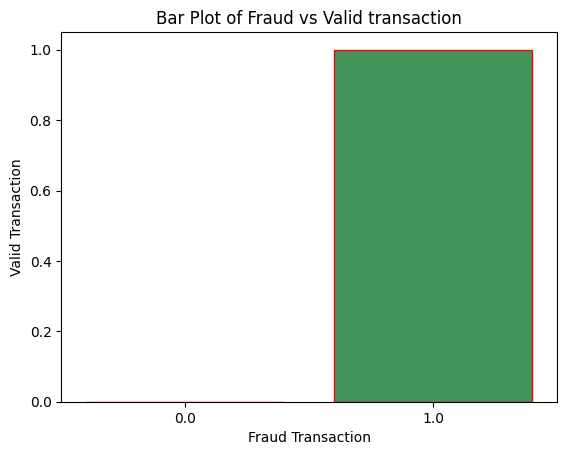

In [ ]:
plt.title("Bar Plot of Fraud vs Valid transaction")
sns.barplot(x='Fraud Transaction',y='Valid Transaction',data=plot_data,palette='Greens',edgecolor='r')

Text(0.5, 1.0, 'Time vs Amount')

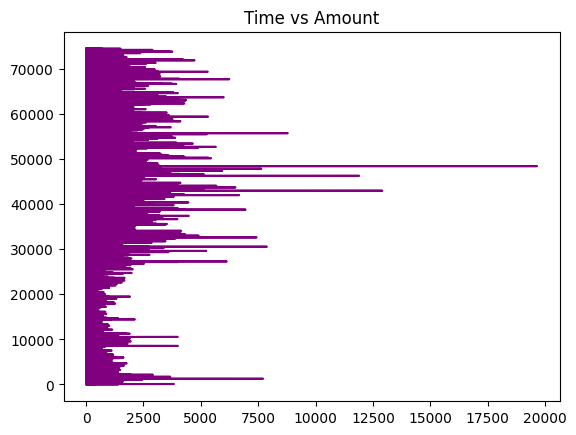

In [ ]:
x = data_df['Amount']
y = data_df['Time']
plt.plot(x,y,color='purple')
plt.title("Time vs Amount")

<ipython-input-50-d98613a01633>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Amount'],color='chocolate')


<Axes: title={'center': 'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

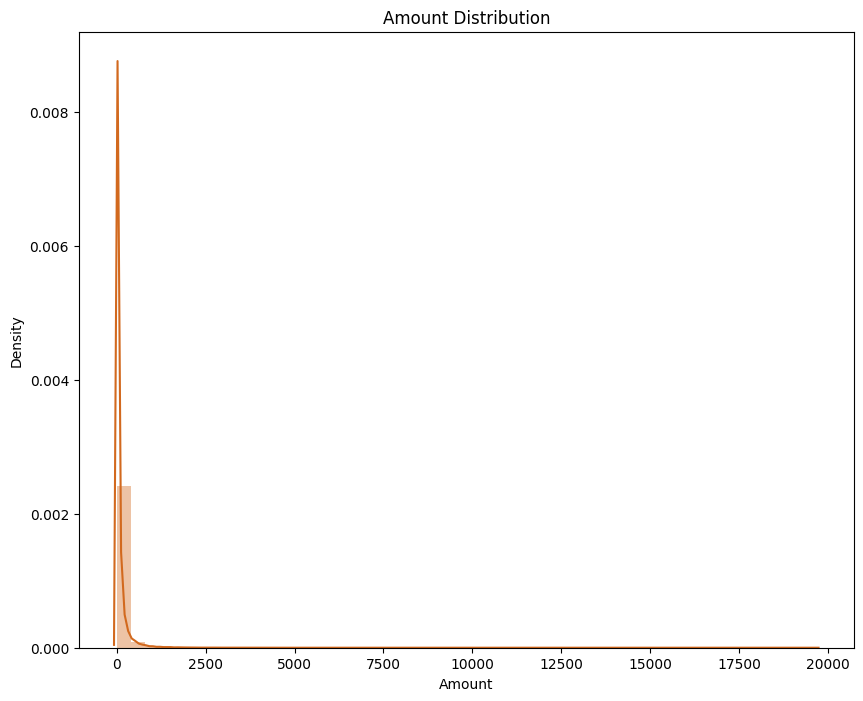

In [ ]:
plt.figure(figsize=(10,8), )
plt.title("Amount Distribution")

sns.distplot(data_df['Amount'],color='chocolate')

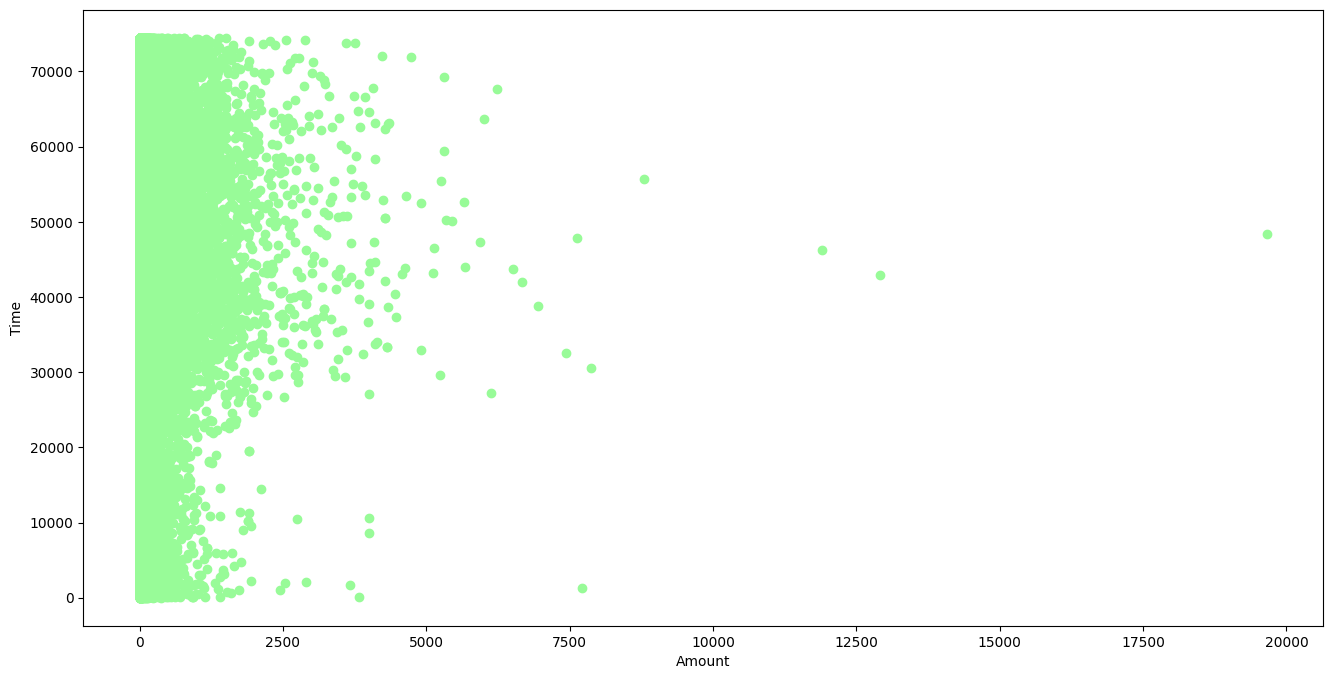

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'],data_df['Time'],color='palegreen')
ax.set_xlabel("Amount")
ax.set_ylabel("Time")
plt.show()

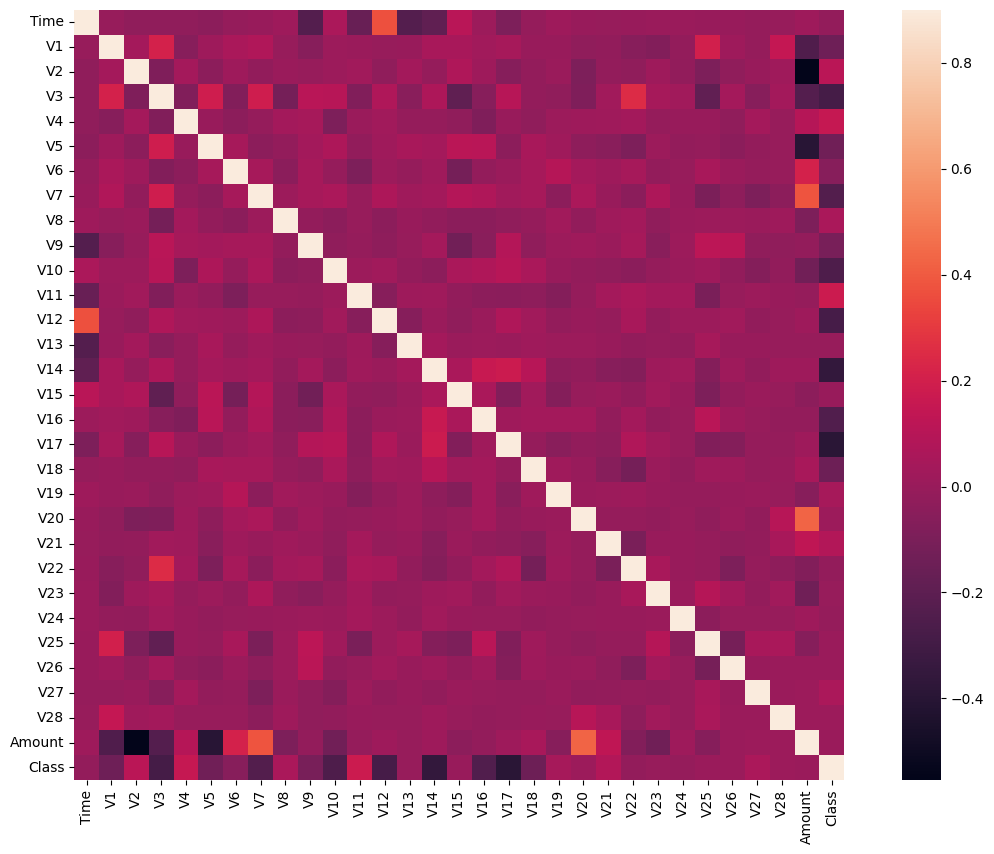

In [ ]:
correlation_metrics = data_df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_metrics,vmax= .9,square=True)
plt.show()

Dropping the Null or nan values

In [ ]:
x = data_df.drop(['Class'],axis=1)
y = data_df['Class']

x1 = x.dropna()
y1 = y.dropna()

Applying ML

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size = 0.2,random_state = 42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(xtest)
accuracy = logreg.score(xtest,ytest)

In [ ]:
accuracy

0.9984180597716875

In [ ]:
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
axis_y_predicted = model.predict(xtest)

print(" ~~~~~~~~~~~~~~~~~~~~~~~~~Results~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(" Mean squared error is:  ", mean_squared_error(ytest, axis_y_predicted))
print("\n Weights i.e m:  ",  model.coef_)
print("\n Intercept i.e b:  ",  model.intercept_)

 ~~~~~~~~~~~~~~~~~~~~~~~~~Results~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Mean squared error is:   0.0011245506018139801

 Weights i.e m:   [ 8.96743803e-09 -1.29682468e-03  2.53477661e-03 -4.37680901e-03
  3.46654618e-03 -1.47892772e-03 -1.38499178e-03 -5.59898497e-03
 -1.46440826e-04 -3.34414481e-03 -7.32736835e-03  5.43222094e-03
 -9.72846420e-03 -4.33936341e-04 -1.19738805e-02 -2.28764227e-04
 -7.85223801e-03 -1.34222851e-02 -4.63708153e-03  1.56934045e-03
 -4.57349952e-04  2.15277591e-03  8.35687662e-04  3.53730303e-04
 -1.94026103e-04 -4.60161564e-05  1.40588745e-03  6.03967122e-05
 -4.88159268e-04  7.57708024e-06]

 Intercept i.e b:   0.0011982454179108003


In [ ]:
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[23323     6]
 [   31    29]]


In [ ]:
print("Accuracy Score of the Logistic Regression model :-> ",accuracy*100," %")

Accuracy Score of the Logistic Regression model :->  99.84180597716875  %
